In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('DuLieuAnKhe2.csv')
print(df.dtypes)

Time           object
WaterLevel    float64
FlowWater     float64
Total         float64
dtype: object


In [3]:
df.head(10)

,Time,WaterLevel,FlowWater,Total
0,2019-10-02 00:00:00,427.18,2.65,0.0
1,2019-10-02 01:00:00,427.19,10.67,0.0
2,2019-10-02 02:00:00,427.20,10.67,0.0
3,2019-10-02 03:00:00,427.20,4.00,0.0
4,2019-10-02 04:00:00,427.19,2.50,0.0
5,2019-10-02 05:00:00,427.19,2.27,0.0
6,2019-10-02 06:00:00,427.18,2.15,0.0
7,2019-10-02 07:00:00,427.18,2.06,0.0
8,2019-10-02 08:00:00,427.17,2.00,0.0
9,2019-10-02 09:00:00,427.17,2.00,0.0


In [4]:
df.shape

(30564, 4)

In [5]:
df.describe()

,WaterLevel,FlowWater,Total
count,30564.000000,30564.000000,30564.00000
mean,429.607426,34.622634,1.34084
std,242.433483,45.696040,7.04787
min,48.420000,1.100000,0.00000
25%,427.830000,4.050000,0.00000
50%,428.180000,32.430000,0.00000
75%,428.730000,39.150000,0.00000
max,42810.000000,537.630000,173.40000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30564 entries, 0 to 30563
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        30564 non-null  object 
 1   WaterLevel  30564 non-null  float64
 2   FlowWater   30564 non-null  float64
 3   Total       30564 non-null  float64
dtypes: float64(3), object(1)
memory usage: 955.3+ KB


In [41]:
df['Time'] = pd.to_datetime(df['Time'])
df = df.loc[df['Time'] >= '2019-10-02 00:00:00']
n_train_rows = int(df.shape[0]*0.8)-1
train = df.iloc[:n_train_rows ,:]
test = df.iloc[n_train_rows: ,:]
print(test.shape)
print(train.shape)

(6114, 4)
(24450, 4)


In [42]:
df.index=df['Time']
train.tail

<bound method NDFrame.tail of                                    Time  WaterLevel  FlowWater  Total
Time                                                                 
2019-10-02 00:00:00 2019-10-02 00:00:00      427.18       2.65    0.0
2019-10-02 01:00:00 2019-10-02 01:00:00      427.19      10.67    0.0
2019-10-02 02:00:00 2019-10-02 02:00:00      427.20      10.67    0.0
2019-10-02 03:00:00 2019-10-02 03:00:00      427.20       4.00    0.0
2019-10-02 04:00:00 2019-10-02 04:00:00      427.19       2.50    0.0
...                                 ...         ...        ...    ...
2022-10-19 12:00:00 2022-10-19 12:00:00      428.98      72.89    0.0
2022-10-19 13:00:00 2022-10-19 13:00:00      428.98      72.95    0.0
2022-10-19 14:00:00 2022-10-19 14:00:00      428.98      73.48    0.0
2022-10-19 15:00:00 2022-10-19 15:00:00      428.98      74.57    0.0
2022-10-19 16:00:00 2022-10-19 16:00:00      428.98      73.92    0.0

[24450 rows x 4 columns]>

In [45]:
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns

# Use only the numeric columns for scaling
scaler = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = scaler.fit_transform(train[numeric_columns].values)
test_set_scaled = scaler.transform(test[numeric_columns].values)
print(training_set_scaled)

[[0.00885748 0.00288893 0.        ]
 [0.00885772 0.01783684 0.        ]
 [0.00885795 0.01783684 0.        ]
 ...
 [0.00889958 0.13490392 0.        ]
 [0.00889958 0.13693549 0.        ]
 [0.00889958 0.135724   0.        ]]


In [53]:
def create_dataset(dataset , n_step =50):
    dataX , dataY = [] ,[]
    for i in range(n_step,len(dataset)):
        dataX.append(dataset[i-n_step:i ,:])
        dataY.append(dataset[i])
    return np.array(dataX) , np.array(dataY)
x_train ,y_train = create_dataset(training_set_scaled, n_step=50)
x_test ,y_test = create_dataset(test_set_scaled, n_step=50)

print(f'X_train:{x_train.shape}')
print(f'y_train:{y_train.shape}')
print(f'x_test:{x_test.shape}')
print(f'X_test:{y_test.shape}')





X_train:(24400, 50, 3)
y_train:(24400, 3)
x_test:(6064, 50, 3)
X_test:(6064, 3)


In [62]:
from keras.models import  Sequential
from keras.layers import Dense , LSTM
input_shape = (x_train.shape[1], x_train.shape[2])

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

,Time,WaterLevel,FlowWater,Total
Time,,,,
2019-10-02,2019-10-02 11:30:00,427.194167,14.265000,1.161667
2019-10-03,2019-10-03 11:30:00,427.432917,10.103750,1.068333
2019-10-04,2019-10-04 11:30:00,427.547083,16.617500,0.000000
2019-10-05,2019-10-05 11:30:00,427.719167,8.895833,0.000000
2019-10-06,2019-10-06 11:30:00,427.664167,2.007083,0.000000


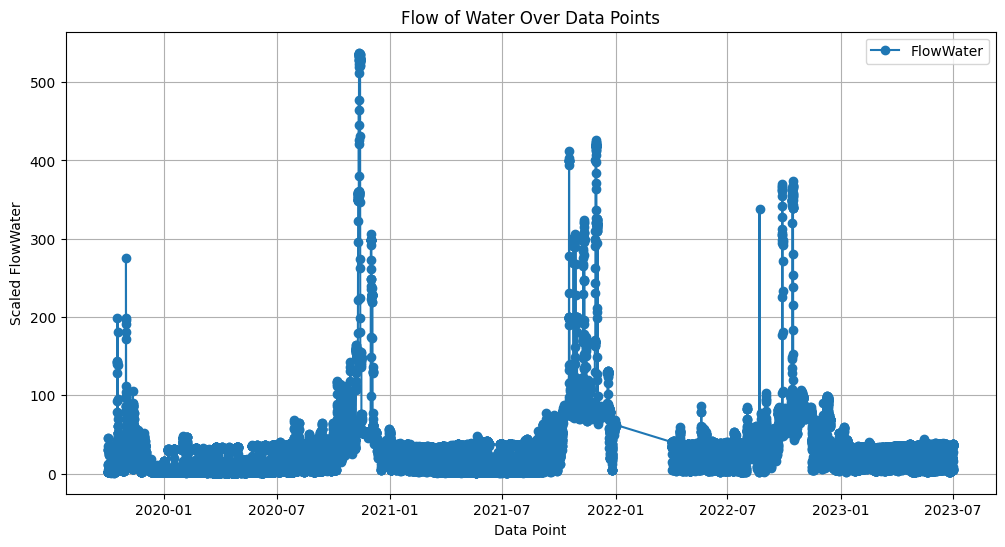

In [17]:
data = df.filter(['FlowWater'])
dataset = data.values  # Remove the parentheses here
training_data_len = int(np.ceil(len(dataset) * 0.80))
print(training_data_len)


24452


In [19]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00288893],
       [0.01783684],
       [0.01783684],
       ...,
       [0.06650141],
       [0.06601681],
       [0.06592362]])

In [18]:
train_data = scaled_data[0:int(training_data_len), :]
x_train =[]
y_train =[]
for i in range(60 , len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()
x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))


[array([0.00288893, 0.01783684, 0.01783684, 0.0054051 , 0.00260936,
       0.00218068, 0.00195702, 0.00178928, 0.00167745, 0.00167745,
       0.00167745, 0.00167745, 0.00167745, 0.00186383, 0.00242298,
       0.01970067, 0.05697724, 0.08182208, 0.08182208, 0.06294149,
       0.05511341, 0.05511341, 0.05511341, 0.05511341, 0.05511341,
       0.04268168, 0.04268168, 0.01783684, 0.0054051 , 0.00391404,
       0.0054051 , 0.00391404, 0.00391404, 0.00391404, 0.00391404,
       0.00391404, 0.00391404, 0.00410042, 0.00410042, 0.00410042,
       0.00536783, 0.00726893, 0.01970067, 0.01971931, 0.01783684,
       0.01916016, 0.04454551, 0.06033213, 0.05511341, 0.05511341,
       0.05718226, 0.05925111, 0.04579427, 0.04579427, 0.01886195,
       0.0054051 , 0.00760442, 0.00743668, 0.00594561, 0.00749259])]
[0.00503233742754366]

[array([0.00288893, 0.01783684, 0.01783684, 0.0054051 , 0.00260936,
       0.00218068, 0.00195702, 0.00178928, 0.00167745, 0.00167745,
       0.00167745, 0.00167745, 0.00

In [20]:
from keras.models import  Sequential
from keras.layers import Dense , LSTM
model = Sequential()
model.add(LSTM(128,return_sequences=True, input_shape =(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train , y_train,batch_size=52 , epochs=10)
test_data = scaled_data[training_data_len -60,:]
x_test =[]
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))
predictions =model.predict(x_test)
predictions =scaler.inverse_transform(predictions)
rmse =np.sqrt(np.mean(((predictions-y_test)**2)))
print(rmse)

NameError: name 'x_train' is not defined